In [69]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [70]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


(28, 28, 1)


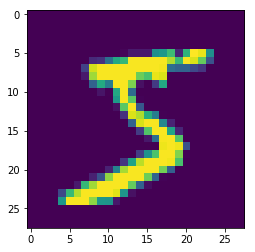

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

print(X_train[0].shape)
plt.imshow(X_train[0].reshape(28, 28))

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [133]:
datagen = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=lambda image: image / 256
)

datagen.fit(X_train)

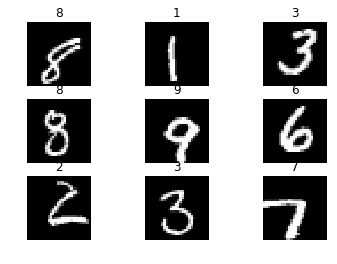

In [121]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(y_batch[i])
    break

In [89]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)


In [134]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
model.fit_generator(
    datagen.flow(X_train, y_train_hot, batch_size=32),
    steps_per_epoch=1800,
    epochs=3
)

Epoch 1/3
1800/1800 [==============================] - 160s - loss: 0.2062 - acc: 0.9348   
Epoch 2/3
1800/1800 [==============================] - 158s - loss: 0.0893 - acc: 0.9732   
Epoch 3/3
1800/1800 [==============================] - 158s - loss: 0.0680 - acc: 0.9791   


In [119]:
model.evaluate(X_test, y_test_hot)

 9984/10000 [============================>.] - ETA: 0s

[0.55640963914500607, 0.96489999999999998]